In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 13, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['figure.autolayout'] = True

In [7]:
df = pd.read_excel("ECommerce_Dataset.xlsx", sheet_name="E Comm")

In [8]:
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3120,53121,0,9.0,Mobile Phone,1,29.0,Debit Card,Male,3.0,6,Mobile Phone,3,Single,2,0,16.0,3.0,5.0,4.0,167.30
2219,52220,0,3.0,Phone,1,13.0,Debit Card,Male,2.0,3,Laptop & Accessory,3,Married,2,0,13.0,4.0,8.0,9.0,134.91
3712,53713,0,11.0,Computer,1,12.0,COD,Male,3.0,2,Mobile Phone,3,Single,2,0,15.0,2.0,2.0,4.0,160.00
1020,51021,0,9.0,Phone,1,18.0,Debit Card,Female,3.0,3,Laptop & Accessory,3,Married,10,1,12.0,0.0,1.0,1.0,146.63
4159,54160,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,1.0,2.0,3.0,169.04
1446,51447,0,5.0,Phone,1,6.0,Debit Card,Male,NaN,3,Mobile,5,Single,2,0,13.0,0.0,1.0,0.0,129.56
4921,54922,1,1.0,Mobile Phone,1,22.0,UPI,Male,3.0,4,Laptop & Accessory,3,Married,9,0,15.0,1.0,2.0,1.0,173.34
4172,54173,0,5.0,Mobile Phone,1,33.0,Debit Card,Male,3.0,4,Mobile Phone,3,Married,3,0,18.0,4.0,5.0,4.0,154.11
5163,55164,0,1.0,Mobile Phone,1,8.0,COD,Male,3.0,4,Mobile Phone,1,Married,6,0,12.0,1.0,2.0,3.0,157.29
2421,52422,0,27.0,Computer,1,17.0,Credit Card,Female,2.0,3,Grocery,1,Married,4,0,20.0,0.0,NaN,12.0,260.32


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [10]:
#memeriksa kolom yang mmeiliki missing values
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
#memeriksa data yang duplikat
df.duplicated().any()

False

In [12]:
#Memisahkan data berdasar jenis data
#Data Numeric

numerical = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'int32') | (df.dtypes == int) | (df.dtypes == 'float64') | (df.dtypes == 'float32') |(df.dtypes == float)].columns.tolist()
numerical

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [13]:
#Data Categorical

categorical_num = ['Churn','CityTier','SatisfactionScore','Complain']
categorical_num

['Churn', 'CityTier', 'SatisfactionScore', 'Complain']

In [14]:
#Data Target
target = df['Churn']
#Churn adalah nilai yang menunjukkan apakah pelanggan berhenti berlangganan (1) atau tidak (0)

In [15]:
a = df[numerical].describe().T
a

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [16]:
# Menambah baris data 'rasio' untuk persenan data yang kosong/NaN
a['NullCount'] = df.isna().sum()
a['Ratio'] = round(a['NullCount']/a['count'],3)
a

,count,mean,std,min,25%,50%,75%,max,NullCount,Ratio
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00,0,0.000
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00,0,0.000
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00,264,0.049
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00,0,0.000
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00,251,0.047
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00,255,0.047
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00,0,0.000
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00,0,0.000
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00,0,0.000
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00,0,0.000


In [17]:
df[categorical_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.0,0.0,0.0,1.0
CityTier,5630.0,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.0,3.0,4.0,5.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0


In [18]:
categorical = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

In [19]:
df[categorical].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [20]:
#menghitung jumlah value dari masing2 kolom (kategori)
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [21]:
nums = df[numerical].describe().T
nums['unique'] = df[numerical].nunique().values.T
nums['range'] = round(nums['max'] - nums['min'], 2)
nums['variance'] = round((nums['std'])**2, 2)
nums['IQR'] = round(nums['75%']- nums['25%'], 2)

central = ['mean', '25%', '50%', '75%']
spread = ['min', 'max', 'range', 'std', 'variance', 'IQR']

nums[['count', 'unique'] + central + spread]

,count,unique,mean,25%,50%,75%,min,max,range,std,variance,IQR
CustomerID,5630.0,5630,52815.500000,51408.25,52815.50,54222.7500,50001.0,55630.00,5629.00,1625.385339,2641877.50,2814.50
Churn,5630.0,2,0.168384,0.00,0.00,0.0000,0.0,1.00,1.00,0.374240,0.14,0.00
Tenure,5366.0,36,10.189899,2.00,9.00,16.0000,0.0,61.00,61.00,8.557241,73.23,14.00
CityTier,5630.0,3,1.654707,1.00,1.00,3.0000,1.0,3.00,2.00,0.915389,0.84,2.00
WarehouseToHome,5379.0,34,15.639896,9.00,14.00,20.0000,5.0,127.00,122.00,8.531475,72.79,11.00
HourSpendOnApp,5375.0,6,2.931535,2.00,3.00,3.0000,0.0,5.00,5.00,0.721926,0.52,1.00
NumberOfDeviceRegistered,5630.0,6,3.688988,3.00,4.00,4.0000,1.0,6.00,5.00,1.023999,1.05,1.00
SatisfactionScore,5630.0,5,3.066785,2.00,3.00,4.0000,1.0,5.00,4.00,1.380194,1.90,2.00
NumberOfAddress,5630.0,15,4.214032,2.00,3.00,6.0000,1.0,22.00,21.00,2.583586,6.67,4.00
Complain,5630.0,2,0.284902,0.00,0.00,1.0000,0.0,1.00,1.00,0.451408,0.20,1.00


##Insight Descriptive Analysis

1) Baris data yang ada missing values serta rasionya :
- **Tenure** = 4,9%
- **WareHouseToHome** = 4,7%
- **HourSpendOnApp** = 4,7%
- **OrderAmountHikeFromlastYear** = 4,9%
- **CouponUsed** = 4,8%
- **OrderCount** = 4,8%
- **DaySinceLastOrder** = 5,8%

2) Kolom dengan tipe data kurang sesuai (float64 >> int64)
- Tenure
- HourSpendOnApp
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder

3) Tidak ada data duplikat

4) Kolom data numerical yang memiliki nilai min/max terlalu jauh dari mean dan median:
- **Tenure**: min 0, max 61, mean 10, median 9
- **WarehouseToHome**: min 5, max 127, mean 15, median 14
- NumberOfAddress: min 1, max 22, mean 4, median 3
- OrderAmountHikeFromlastYear: min 11, max 26, mean 15, median 15
- CouponUsed: min 0, max 16, mean 1, median 1
- OrderCount: min 1, max 16, mean 3, median 2
- **DaySinceLastOrder**: min 0, max 46, mean 4, median 3
- **CashbackAmount**: min 0, max 324, mean 177, median 163

5) Pada kolom **PreferredLoginDevice** antara **Mobile Phone** dan **Phone** sepertinya jenis yang sama jadi digabung saja

6) Pada kolom **PreferredPaymentMode**:
- **Credit Card** dan **CC** itu sama, jadi akan digabung
- **Cash on Delivery** dan **COD** itu juga sama, jadi akan digabung
- awal ada **7** data unique karena ada yang sama jadi dikurangi tinggal **5** kategori

7) Pada kolom **PreferredOrderCat** antara **Mobile Phone** dan **Mobile** sepertinya jenis yang sama jadi digabung saja

In [22]:
#mengubah value count pada beberapa kolom (digabung yg kategorinya sama)
df.loc[df['PreferredLoginDevice']=='Mobile Phone','PreferredLoginDevice'] = 'Phone'
df['PreferredPaymentMode'].replace({'CC':'Credit Card','Cash on Delivery':'COD'},inplace=True)
df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'}, inplace=True)

for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Phone       3996
Computer    1634
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



### Proporsi Fitur Kategori
Apakah frekuensi dari nilai yang paling umum timpang?
- PreferredLoginDevice, top frequency mobile phone = 70,97%
- PreferredPaymentMode, top frequency Debit Card = 41,10 %
- Gender, top frequency Gender = 60,10 %
- PreferedOrderCat, top frequency mobile phone = 36,94 %
- MaritalStatus, top frequency Married = 53,30 %

# Univariate Analysis

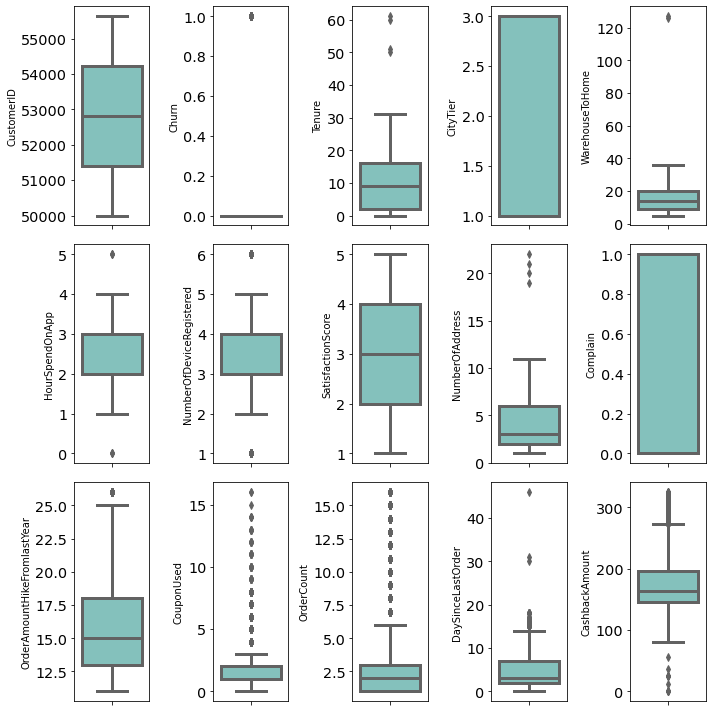

In [23]:
#visualisasi untuk  melihat outlier
plt.figure(figsize=(10,10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[numerical[i]], palette='GnBu', orient='v')
    plt.tight_layout()

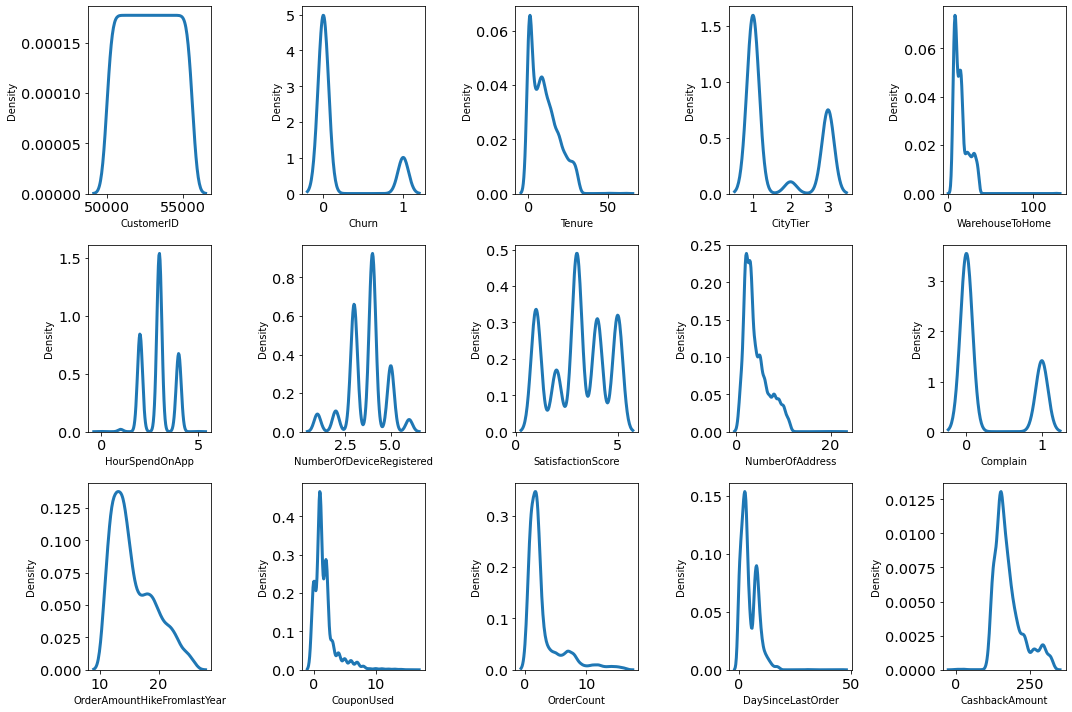

In [24]:
plt.figure(figsize=(15,10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[numerical[i]], palette='GnBu')
    plt.xlabel(numerical[i])
    plt.tight_layout()

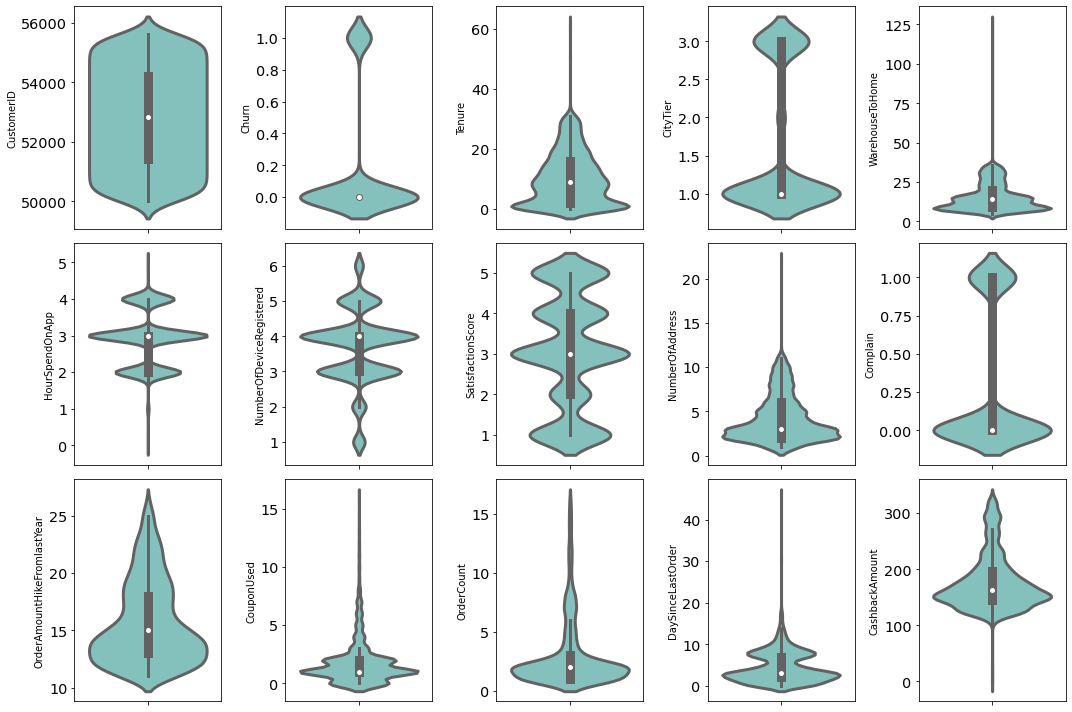

In [25]:
plt.figure(figsize=(15, 10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[numerical[i]], palette='GnBu')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

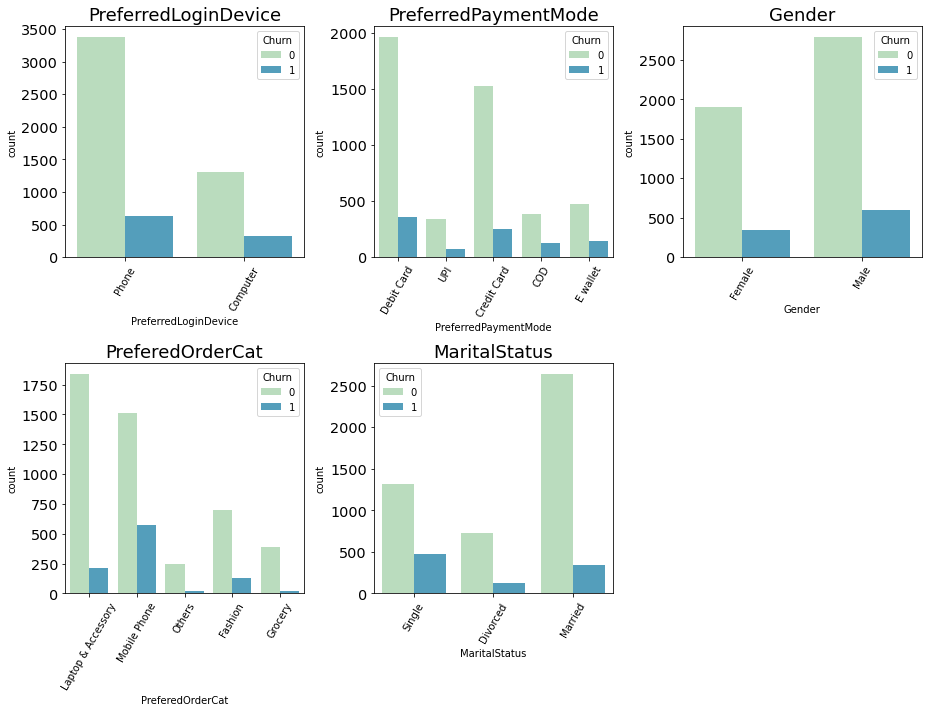

In [26]:
fig = plt.figure(figsize=(13,10))
for i in range(0, len(categorical)):
    plt.subplot(2, 3, i+1)
    plt.xticks(rotation=60, fontsize=10)
    plt.title(categorical[i],fontsize=18)
    sns.countplot(df[categorical[i]], hue=target, palette='GnBu', orient='h')
    plt.tight_layout(pad=8)

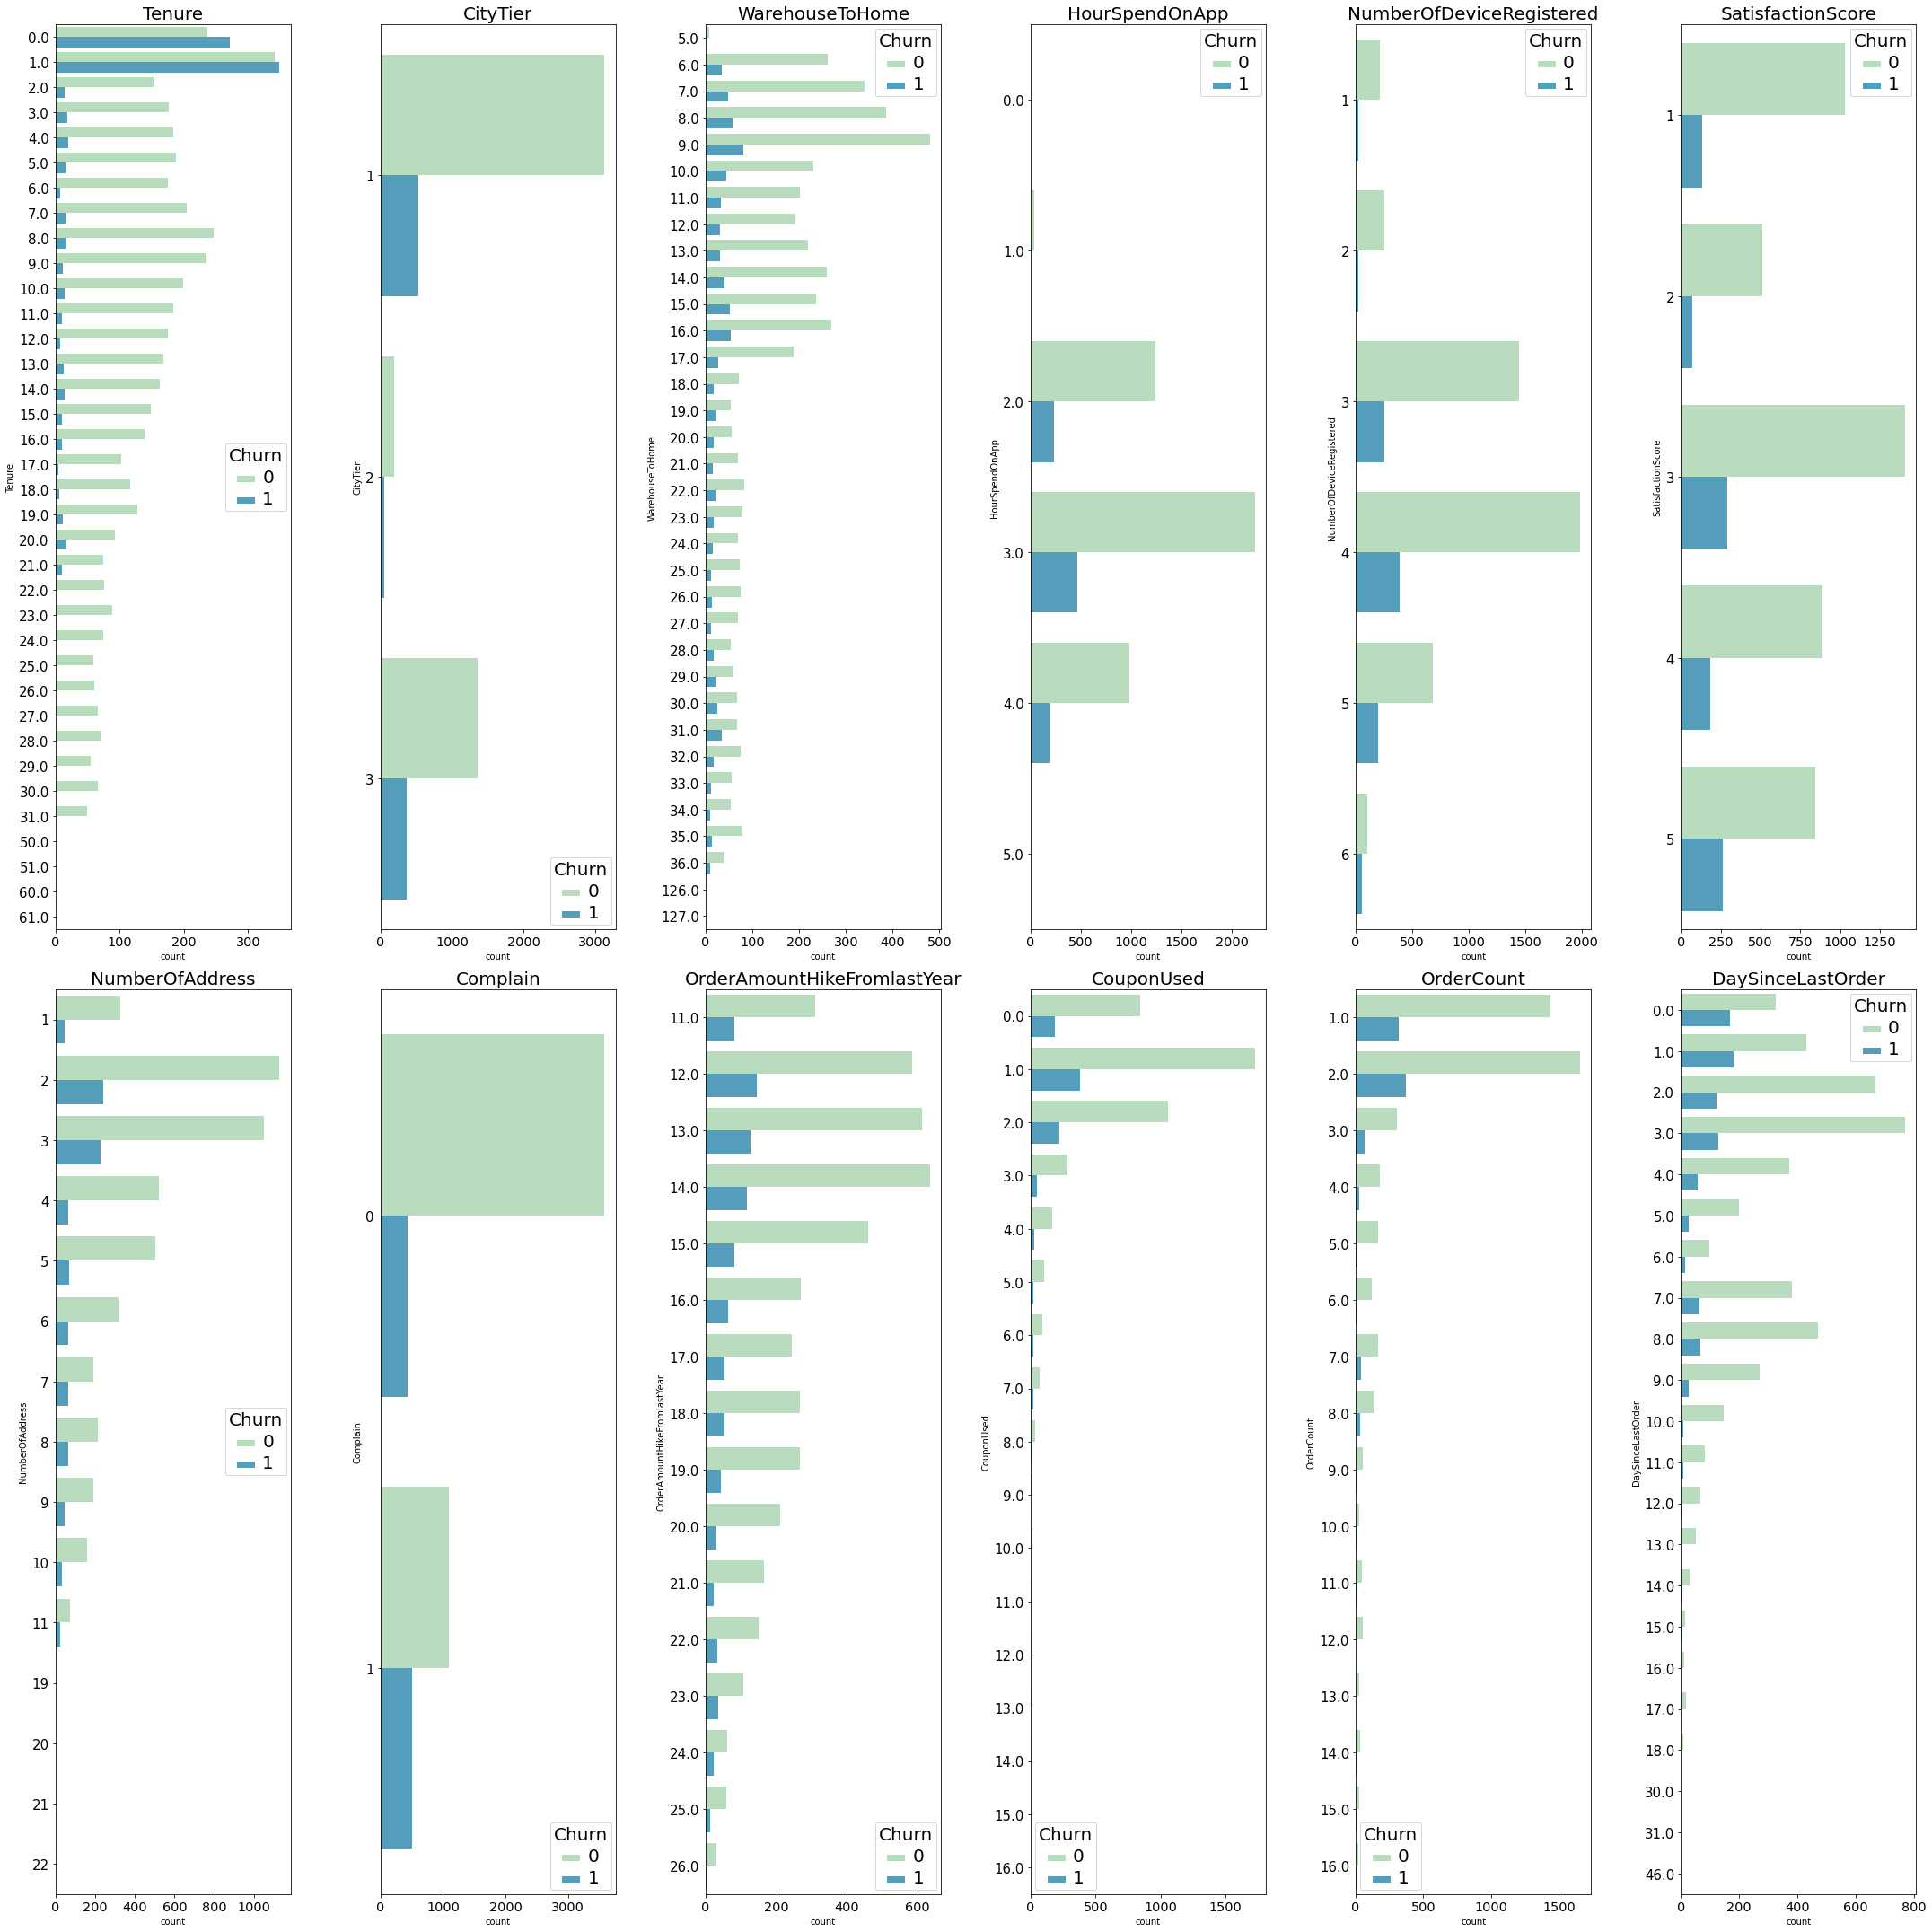

In [27]:
nums0= df[numerical]
#drop karena jumlah unique terlalu banyak
nums1 = nums0.drop(['Churn','CustomerID','CashbackAmount'], axis=1)

# nums1=df[numerical]
fig = plt.figure(figsize=(30,30))
for index, col in enumerate(nums1):
    ax=fig.add_subplot(2, 6, index+1)
    ax.set_title(col,fontsize=20)
    plt.yticks(fontsize=15)
    f= sns.countplot(y=df[col], hue=target, ax=ax, palette="GnBu")
    plt.setp(f.get_legend().get_texts(), fontsize='20')
    plt.setp(f.get_legend().get_title(), fontsize='20')
plt.tight_layout(pad=8);

## Insight Univariate Analysis
1) Boxplot
- WarehouseToHome ada outlier satu yang sangat jauh/ekstrem
- CouponUsed, OrderCount, DaySinceLastOrder, dan CashbackAmount memiliki banyak outlier

2) Kdeplot
- **positive skewed (right)**: Tenure, WarehouseToHome, NumerOfAddress, OrderAmountHikeFromlastYear, CouponUsed, DaySinceLastOrder, OrderCount, CashbackAmount
- **bimodal**: Churn, Complain
- **multimodal**: CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore
- **Unimodal/Simetris**: Churn

3) Countplot

(a) Churn pada Data Categorical
- **PreferredLoginDevice** : pelanggan yang churn mayoritas login melalui **phone** 
- **PreferredPaymentMode** : pelanggan yang melakukan churn paling banyak melakukan pembayaran melalui **debit card**
- **Gender** : pelanggan churn paling banyak dilakukan oleh **laki-laki (male)**
- **PreferedOrderCat** : churn paling banyak dilakukan oleh pelanggan yang membeli **mobile phone**
- **MaritalStatus** : mayoritas pelanggan yang churn berstatus **single**

(b) Churn pada Data Numerical
- **Tenure** : pelanggan yang mayoritas churn memiliki tenure selama **1** (kurang tahu satuannya)
- **CityTier** : pelanggan yang churn paling banyak berada kota tingkat **1**
- **WarehouseToHome** : churn banyak dilakukan oleh pelanggan yang jarak rumahnya dengan gudang sekitar **9** (kilometer)
- **HourSpendOnApp** : pelanggan yang paling banyak churn adalah pelanggan yang menghabiskan waktu sekitar **3 jam** pada mobile phone atau website
- **NumberOfDeviceRegistered** : Jumlah device yang paling banyak terdaftar pada pelanggan yang melakukan churn adalah **4**
- **SatisfactionScore** : Skor kepuasan yang paling banyak diberikan oleh pelanggan yang melakukan churn adalah **3**
- **NumberOfAddress** : jumlah alamat yang paling banyak ditambahkan oleh pelanggan yang melakukan churn yaitu **2**
- **Complain** : dalam sebulan terakhir pelanggan yang melakukan churn banyak **melakukan komplain**
- **OrderAmountHikeFromlastYear** : dalam setahun terakhir, pelanggan yang churn mayoritas terdapat peningkatan persentase order sebesar **12%**
- **CouponUsed** : dalam sebulan terakhir, pelanggan yang churn mayoritas menggunakan kupon sebanyak **1**
- **OrderCount** : dalam sebulan terakhir, pelanggan yang churn mayoritas melakukan order sebanyak **2** kali
- **DaySinceLastOrder** : mayoritas rata2 hari customer melakukan churn sejak terakhir order yaitu **0** dan **1** hari

### Rencana Pre-Processing
1. **Handling missing values with imputation (numeric)**: 
- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median


2. **Handling an outliers**
- Using Z score to all positively skewed distribution 


3. **Feature Transformation**
- Using Log Transformation to all positively skewed distribution


4. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding


5. **Class Imbalance**
 Apakah frekuensi dari nilai yang paling umum timpang?
- PreferredLoginDevice, top frequency mobile phone = 70,97%    ==========> Undersampling
- PreferredPaymentMode, top frequency Debit Card = 41%        
- Gender, top frequency Gender = 60%                          ============> Undersampling
- PreferedOrderCat, top frequency mobile phone = 36,94 %
- MaritalStatus, top frequency Married = 53,30 %              ============> Undersampling

# Multivariate Analysis

In [28]:
df.drop('CustomerID', axis=1).corr()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525
OrderAmountHikeFromlastYear,-0.010058,0.005825,-0.031408,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869


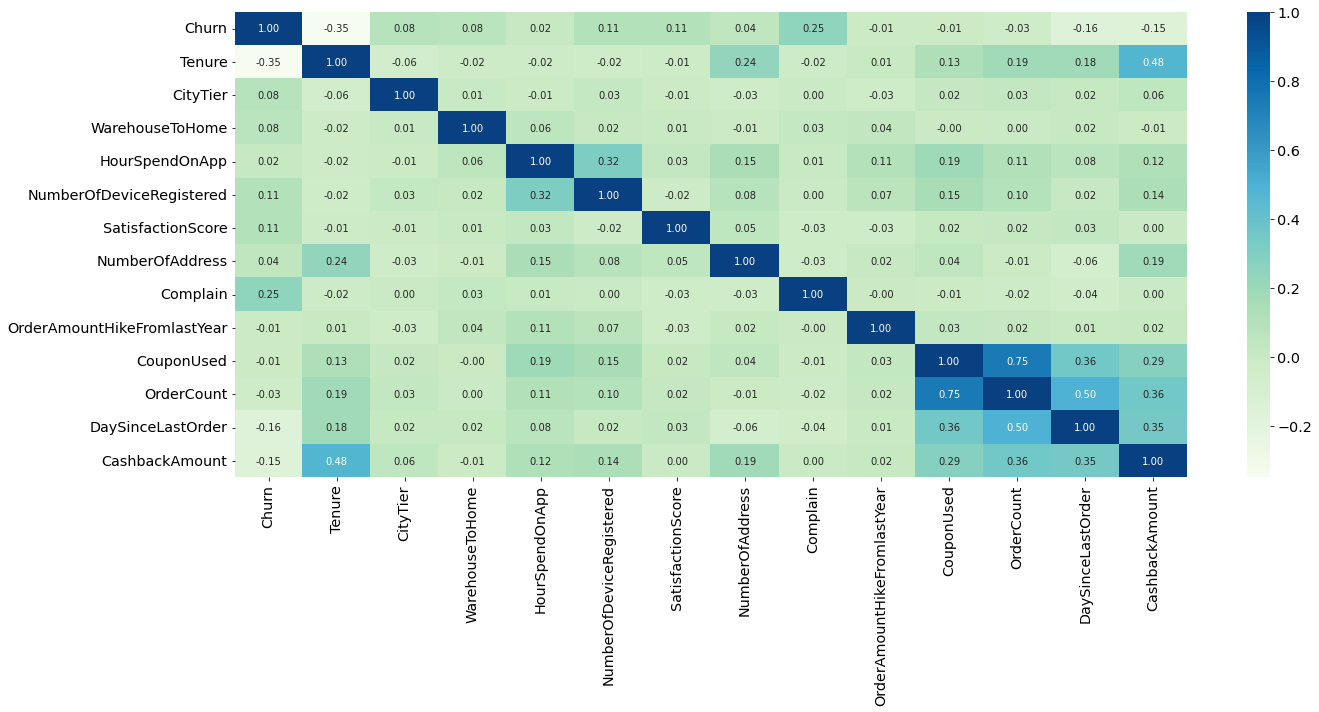

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

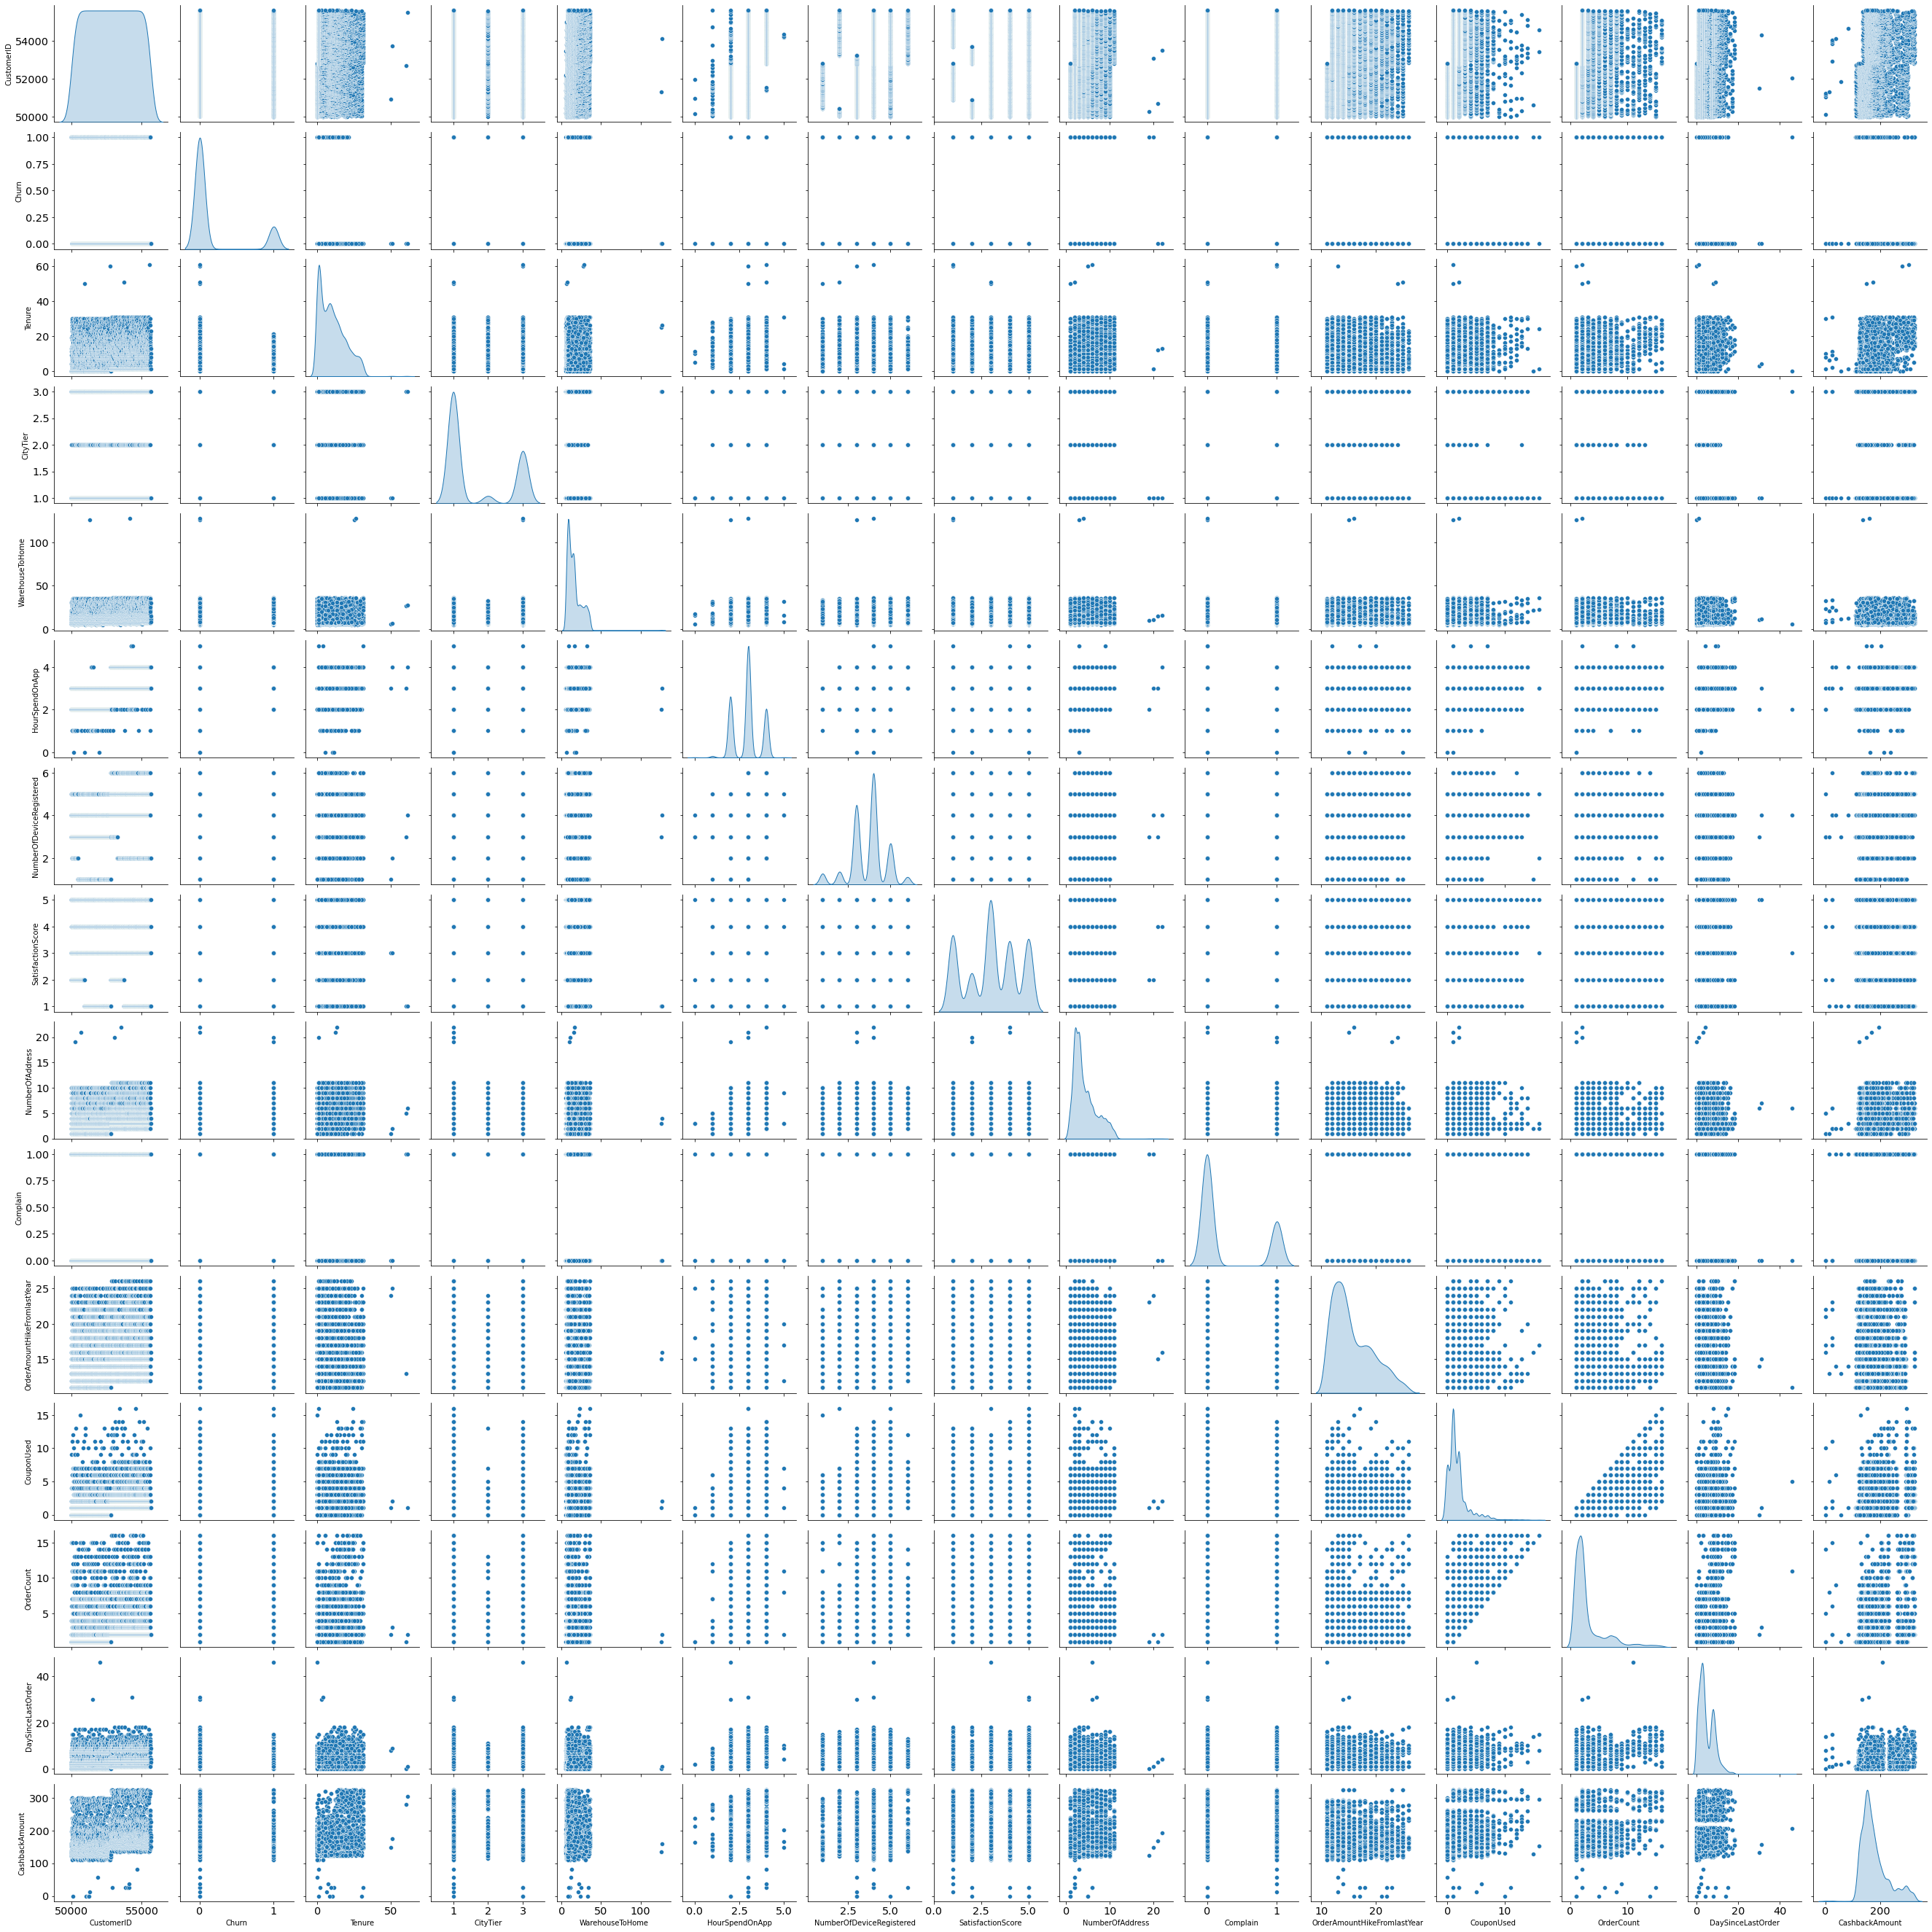

In [30]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', palette='GnBu')

## Insight Multivariate Analysis

1) Pada **Churn** ditemukan korelasi sebagai berikut:

- korelasi **churn** dengan **tenure** sebesar -0,35 yang artinya **semakin tinggi tenure makan kemungkinan pelanggan untuk churn semakin rendah, sebaliknya semakin kecil tenure maka kemungkinan pelanggan churn semakin tinggi**
- korelasi antara **churn** dengan **complain** sebesar 0,25, artinya **semakin banyak pelanggan melakukan komplain maka kemungkinan pelanggan churn juga semakin tinggi**
- hasil korelasi tersebut mendukung data countplot sebelumnya

2) Terdapat korelasi antara **tenure**  dengan **CashbackAmount** yaitu sebesar 0,48 artinya **jika dalam sebulan terakhir pelanggan semakin banyak mendapatkan cashback maka tenure-nya akan semakin tinggi**

# BUSINESS INSIGHT

1) **Churn, Tenure, dan CashbackAmount**

In [31]:
def show_values(axis, orientation="vertical", space=.01):
    def show(ax):
        if orientation == "vertical":
            for p in ax.patches:
                x = p.get_x() + p.get_width() / 2
                y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(x, y, value, ha="center") 
        elif orientation == "horizontal":
            for p in ax.patches:
                x = p.get_x() + p.get_width() + float(space)
                y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(x, y, value, ha="left")

    if isinstance(axis, np.ndarray):
        for idx, ax in np.ndenumerate(axis):
            show(axis)
    else:
        show(axis)

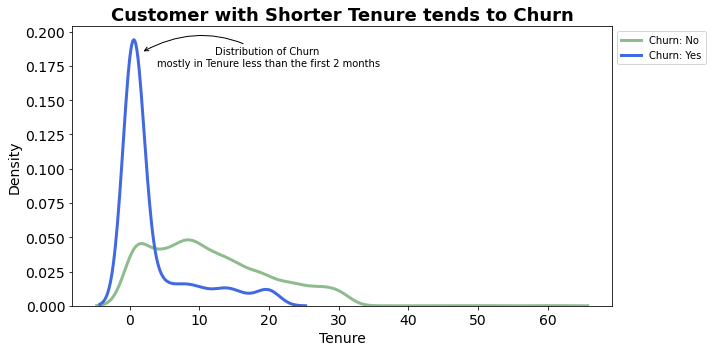

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'darkseagreen', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'royalblue', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Distribution of Churn \nmostly in Tenure less than the first 2 months', 
            xy=(1.75, 0.185), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

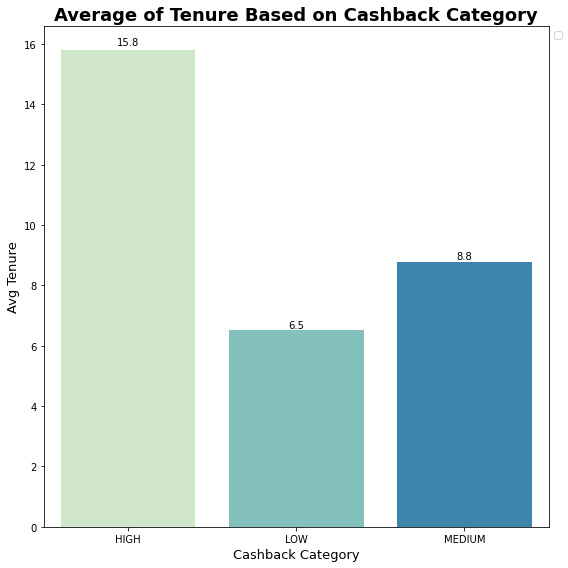

In [33]:
#melakukan kategorisasi cashback amount
df0=df['CashbackAmount'].reset_index()
Q1 = df0['CashbackAmount'].quantile(0.25)
Q3 = df0['CashbackAmount'].quantile(0.75)

df0['CashCat']=np.where(df0['CashbackAmount']<Q1,'LOW',
                        np.where(df0['CashbackAmount'] <= Q3, 'MEDIUM', 'HIGH'))

#join kolom
df1 = df[['CustomerID','Churn','Tenure','CashbackAmount']]
df2 = df1.join(df0.set_index('CashbackAmount'), on='CashbackAmount').reset_index()
df3 = df2.groupby(['CashCat']).agg({'Tenure':'mean','CustomerID':'nunique'}).reset_index()
df3.columns= ['CashCat','AvgTenure','TotalCust']
df3

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=df3, x='CashCat', y='AvgTenure', palette='GnBu')
plt.title('Average of Tenure Based on Cashback Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Cashback Category',fontsize=13);
plt.ylabel('Avg Tenure',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

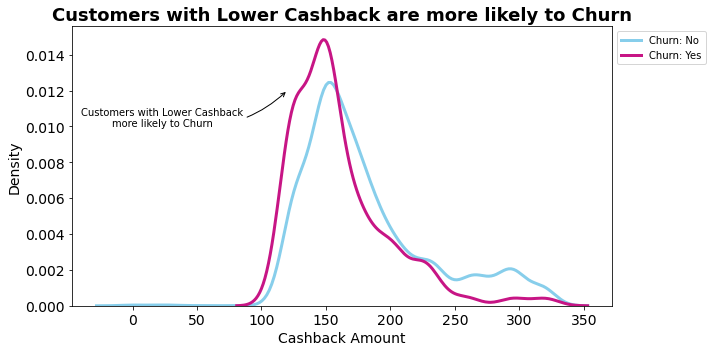

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['CashbackAmount'].dropna(), color= 'skyblue', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['CashbackAmount'].dropna(), color= 'mediumvioletred', label= 'Churn: Yes', ax=ax)

ax.set_title('Customers with Lower Cashback are more likely to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Cashback Amount', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Customers with Lower Cashback\nmore likely to Churn', 
            xy=(120, 0.012), xytext=(23, 0.01), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

**Insight**:
Pelanggan dengan tenure rendah cenderung mendapatkan cashback yang tergolong sedikit dan memiliki potensi untuk melakukan churn

**Business Recommendation**: Memberikan promo kepada pelanggan berupa kupon atau cashback agar pelanggan terus bertahan atau memperpanjang tenure dan kembali berbelanja di e-commerce.

- **Churn, Complain, dan PreferredOrderCat**

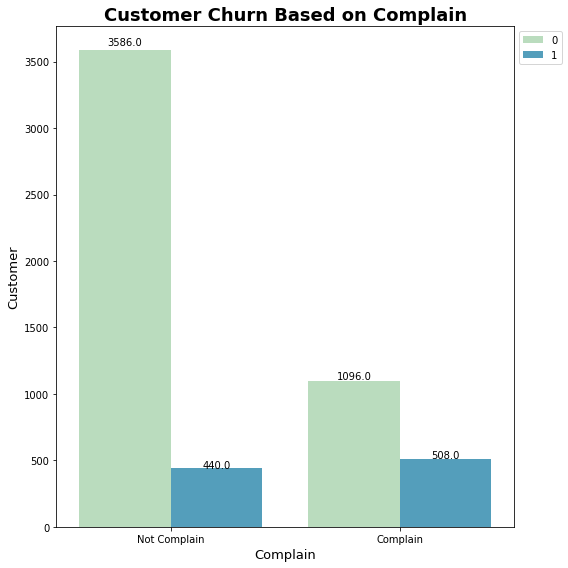

In [35]:
dfchurncomplain = df.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfchurncomplain['Complain'] = dfchurncomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfchurncomplain, x='Complain', y='CustomerID', hue='Churn', palette='GnBu')
plt.title('Customer Churn Based on Complain', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Complain',fontsize=13);
plt.ylabel('Customer',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [36]:
dfcategory0=df.groupby(['PreferedOrderCat','Churn', 'Complain',]).agg({'CustomerID':'count'}).reset_index()
dfcategory0['Complain'] = dfcategory0['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcategory0

,PreferedOrderCat,Churn,Complain,CustomerID
0,Fashion,0,Not Complain,508
1,Fashion,0,Complain,190
2,Fashion,1,Not Complain,76
3,Fashion,1,Complain,52
4,Grocery,0,Not Complain,276
5,Grocery,0,Complain,114
6,Grocery,1,Not Complain,8
7,Grocery,1,Complain,12
8,Laptop & Accessory,0,Not Complain,1386
9,Laptop & Accessory,0,Complain,454


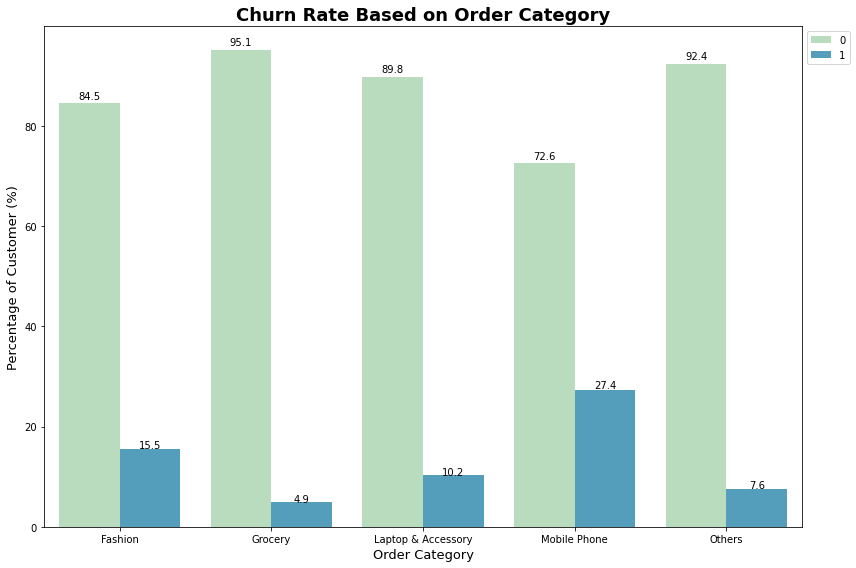

In [37]:
dfcategory=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='PreferedOrderCat')

dfcategory2.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcategory2, x='PreferedOrderCat', y='Ratio', hue='Churn', palette='GnBu')
plt.title('Churn Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

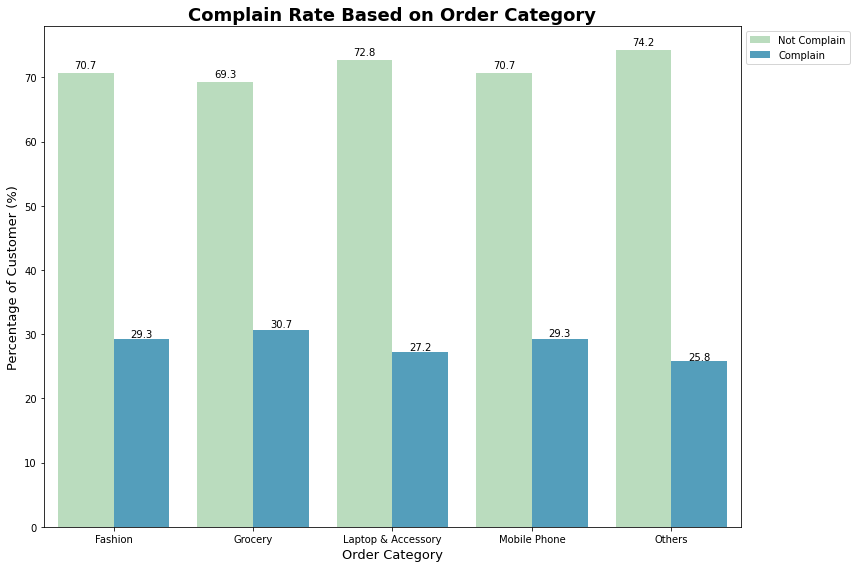

In [38]:
dfcomplain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain['Complain'] = dfcomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcomplain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain3 = dfcomplain.merge(dfcomplain2, how='left',
              on='PreferedOrderCat')

dfcomplain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
dfcomplain3['Ratio'] = (dfcomplain3['Num_Customer'] / dfcomplain3['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcomplain3, x='PreferedOrderCat', y='Ratio', hue='Complain', palette='GnBu')
plt.title('Complain Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**Insight**: 
- Pelanggan yang melakukan churn karena komplain lebih tinggi dibanding yang tidak komplain dan mayoritas membeli mobile phone
- Komplain paling banyak dilakukan oleh pelanggan membeli grocery atau kebutuhan sehari-hari, lalu disusul mobile phone dan fashion

**Business Recommendation**:
- Bagi pelanggan yang baru saja membeli barang elektronik, cross-selling dapat dilakukan dengan menawarkan aksesoris elektronik, seperti keyboard, mouse, dll
- Untuk grocery, menawarkan service pengiriman cepat untuk menjaga kualitas produk
- Untuk fashion dan mobile phone, menawarkan tampilan foto produk yang original atau asli dan deskripsi produk yang jelas

# Pre-Processing
1. **Handling missing values with imputation (numeric)**: 
- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median


2. **Handling an outliers**
- Using Z score to all positively skewed distribution 


3. **Feature Transformation**
- Using Log Transformation to all positively skewed distribution


4. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding


5. **Class Imbalance** 
<br> Apakah frekuensi masing-masing nilai pada target timpang?
<br> 0 : 4882
<br> 1 : 948
<br> Persentase ketimpangan 16.838 %
<br> Berdasarakan https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data ada tiga tingkat ketimpangan yaitu mild, moderate dan extreme. Data ini tergolong pada tingkat ketimpangan moderate.

# 1. **Handling missing values with imputation (numeric)**:

- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median

In [39]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## 1.1. Tenure

In [40]:
df = df.sort_values(['CashbackAmount','NumberOfAddress','OrderCount','DaySinceLastOrder','CouponUsed'])
dp = df.copy()
dp = dp.sort_values(['CashbackAmount','NumberOfAddress'])
dp['Tenure'].fillna(method='ffill', inplace=True)
dp.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1026,51027,0,1.0,Phone,1,33.0,Credit Card,Female,2.0,5,Laptop & Accessory,5,Married,1,0,21.0,1.0,1.0,0.0,0.0
1255,51256,0,8.0,Phone,3,24.0,Credit Card,Male,3.0,3,Laptop & Accessory,5,Married,1,0,16.0,0.0,1.0,4.0,0.0
101,50102,0,10.0,Computer,3,10.0,E wallet,Male,2.0,3,Mobile Phone,2,Married,5,0,17.0,1.0,5.0,8.0,0.0
1176,51177,0,30.0,Computer,3,8.0,Credit Card,Male,2.0,3,Grocery,4,Married,5,0,22.0,10.0,14.0,14.0,0.0
1300,51301,0,6.0,Phone,1,21.0,Credit Card,Female,3.0,3,Laptop & Accessory,1,Married,1,1,13.0,5.0,8.0,1.0,12.0


## 1.2. WareHouseToHome

In [41]:
dp['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

## 1.3. HourSpendOnApp

In [42]:
gender = df['Gender'].value_counts().index
maritalstatus = df['MaritalStatus'].value_counts().index
PreferredLoginDevice = df['PreferredLoginDevice'].value_counts().index
x = []
nan = np.nan
for index, kolom in df.iterrows():
    if kolom['HourSpendOnApp'] > 0:
        b = kolom['HourSpendOnApp']
        x.append(b)
    else:
        for i in gender:
            for j in maritalstatus:
                for k in PreferredLoginDevice:
                    if (kolom['Gender'] == i) & (kolom['MaritalStatus'] == j) & (kolom['PreferredLoginDevice'] == k):
                        b = df['HourSpendOnApp'][(df['Gender'] == i) & (df['MaritalStatus'] == j) & (df['PreferredLoginDevice'] == k)].median()
                        x.append(b)
dp['HourSpendOnApp'] = x

## 1.4. OrderAmountHikeFromlastYear

In [43]:
dp['OrderAmountHikeFromlastYear'].fillna(dp['OrderAmountHikeFromlastYear'].median(), inplace=True)

## 1.5. CouponUsed

In [44]:
b = []
for index, kolom in dp.iterrows():
    if kolom['CouponUsed'] >= 0:
        a=kolom['CouponUsed']
        b.append(a)
    else:
        a=kolom['OrderCount']
        b.append(a)


dp['CouponUsed']=b

## 1.6. OrderCount

In [45]:
dp = dp.sort_values(['CouponUsed','DaySinceLastOrder','CashbackAmount','OrderCount'])
dp['OrderCount'].fillna(method='ffill',inplace=True)
# pd.options.display.min_rows = 5630
# pd.options.display.max_rows = 5630
# dp.head(5630) 

## 1.7. DaySinceLastOrder

In [46]:
dp = dp.sort_values(['OrderCount','CouponUsed','CashbackAmount','Tenure']) #GASS
dp['DaySinceLastOrder'].fillna(method='ffill',inplace=True)

In [47]:
dp.sort_values('WarehouseToHome').tail(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5484,55485,0,3.0,Phone,1,36.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Married,10,0,18.0,1.0,2.0,7.0,188.84
5233,55234,0,2.0,Phone,1,36.0,Debit Card,Male,4.0,6,Laptop & Accessory,4,Married,3,0,15.0,1.0,2.0,8.0,190.49
2894,52895,1,2.0,Phone,1,36.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Divorced,9,1,20.0,1.0,2.0,1.0,191.73
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile Phone,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


In [49]:
#karena data sudah terisi semua maka beberapa tipe data baru dapat diubah
dp = dp.astype({"Tenure":'int64',"WarehouseToHome":'int64',"HourSpendOnApp":'int64',
                   "OrderAmountHikeFromlastYear":'int64',"CouponUsed":'int64',
                   "OrderCount":'int64',"DaySinceLastOrder":'int64'
                   })

# 2. Feature Selection & Extraction
- Using DaySinceLastOrder or WeekSinceLastOrder
- Drop OrderCount
- New Features: WeekSinceLastOrder, OrderMean, CashbackRate

## 2.1. WeekSinceLastOrder

In [52]:
b = []
for index,kolom in dp.iterrows():
    if (kolom['DaySinceLastOrder'] >= 0) & (kolom['DaySinceLastOrder'] <=7):
        a = 1
        b.append(a)
    elif (kolom['DaySinceLastOrder'] > 7) & (kolom['DaySinceLastOrder'] <=14):
        a = 2
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >14) & (kolom['DaySinceLastOrder'] <=21):
        a = 3
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >21) & (kolom['DaySinceLastOrder'] <=28):
        a = 4
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >28) & (kolom['DaySinceLastOrder'] <=35):
        a = 5
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >35) & (kolom['DaySinceLastOrder'] <=42):
        a = 6
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >42) & (kolom['DaySinceLastOrder'] <=49):
        a = 7
        b.append(a)
    else:
        a = np.nan
        b.append(a)
dp['WeekSinceLastOrder'] = b

b = []
for index,kolom in df.iterrows():
    if (kolom['DaySinceLastOrder'] >= 0) & (kolom['DaySinceLastOrder'] <=7):
        a = 1
        b.append(a)
    elif (kolom['DaySinceLastOrder'] > 7) & (kolom['DaySinceLastOrder'] <=14):
        a = 2
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >14) & (kolom['DaySinceLastOrder'] <=21):
        a = 3
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >21) & (kolom['DaySinceLastOrder'] <=28):
        a = 4
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >28) & (kolom['DaySinceLastOrder'] <=35):
        a = 5
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >35) & (kolom['DaySinceLastOrder'] <=42):
        a = 6
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >42) & (kolom['DaySinceLastOrder'] <=49):
        a = 7
        b.append(a)
    else:
        a = np.nan
        b.append(a)
df['WeekSinceLastOrder'] = b

## 2.2. OrderMean

In [53]:
dp['OrderMean'] = dp['OrderCount']/dp['NumberOfAddress']
df['OrderMean'] = df['OrderCount']/df['NumberOfAddress']

## 2.3. CashbackRate

In [54]:
dp['CashbackRate'] = dp['CashbackAmount']/dp['OrderCount']
df['CashbackRate'] = df['CashbackAmount']/df['OrderCount']

Text(0.5, 1.0, 'Before Fillna')

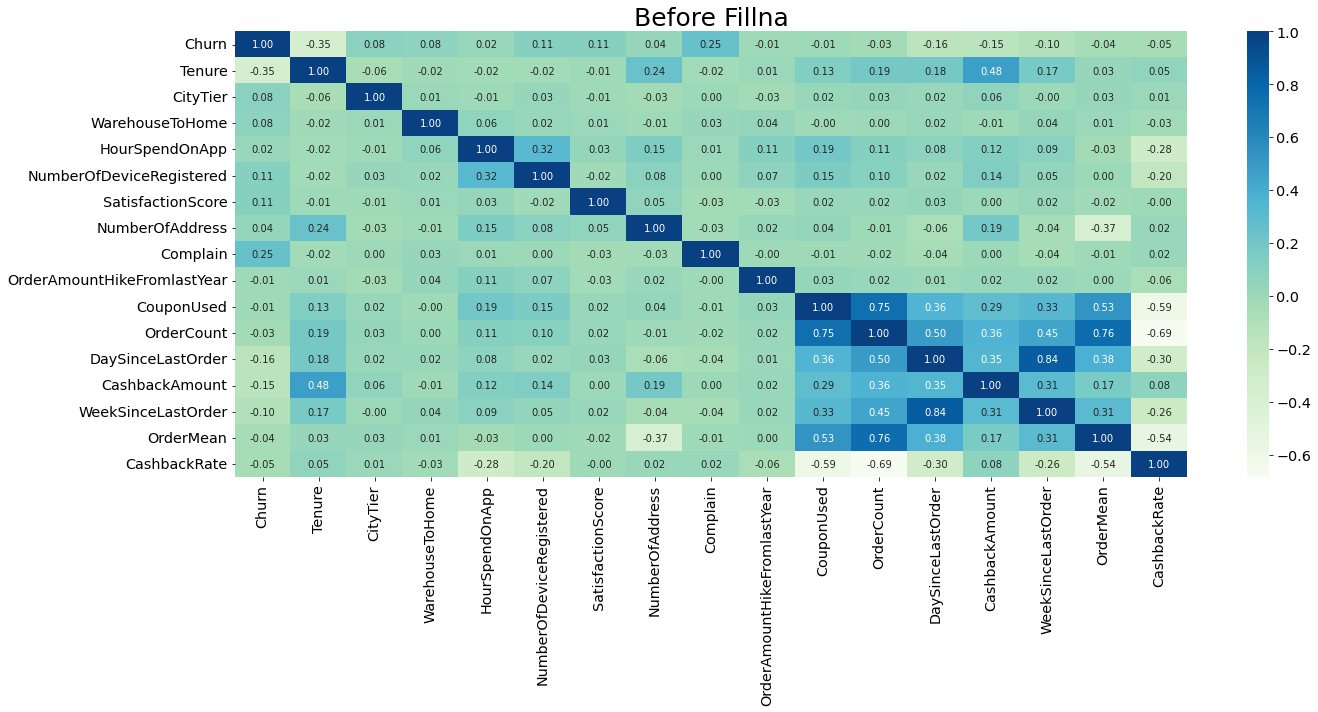

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f') # nan
plt.title('Before Fillna', fontsize=25)

Text(0.5, 1.0, 'After Fillna')

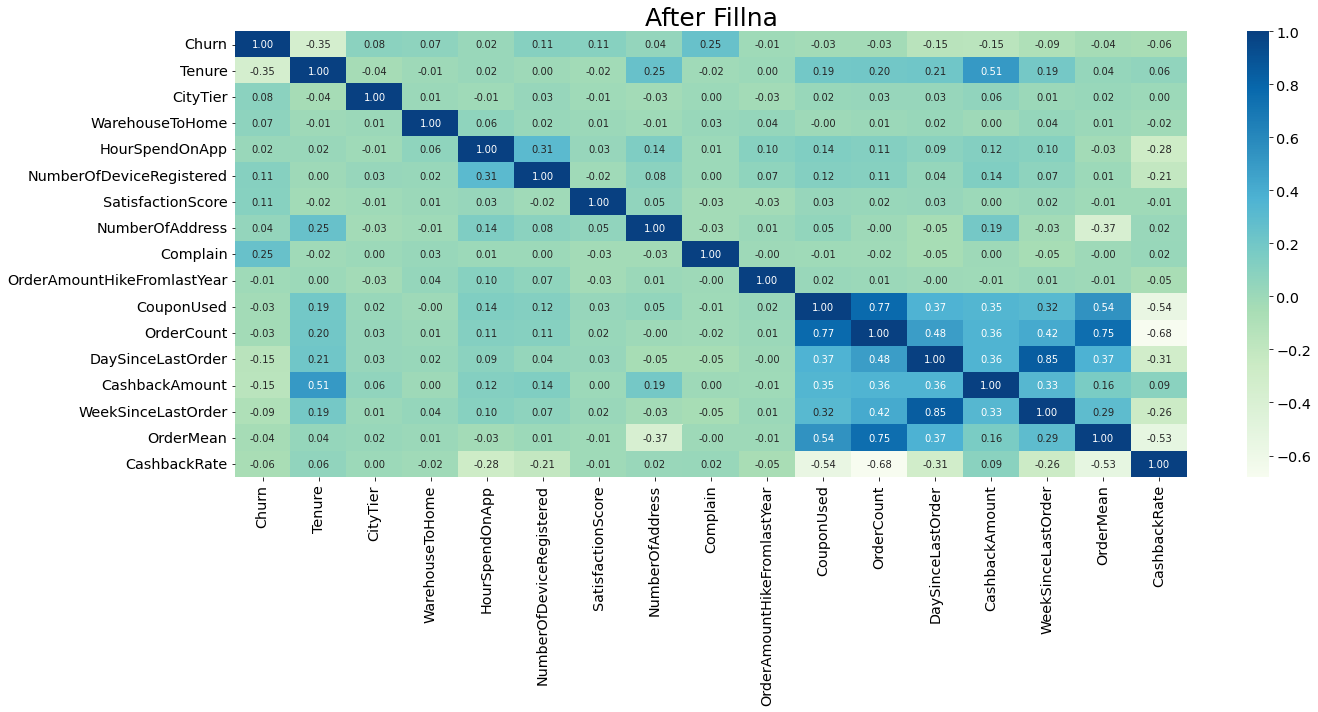

In [56]:
plt.figure(figsize=(20, 10))
sns.heatmap(dp.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f') #non nan
plt.title('After Fillna', fontsize=25)

In [57]:
dp.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
WeekSinceLastOrder             0
OrderMean                      0
CashbackRate                   0
dtype: int64

In [58]:
dp_mishandling = dp.copy()

In [59]:
dp_mishandling.drop('OrderCount',axis = 1, inplace=True)
dp_days= dp_mishandling.copy()
dp_weeks= dp_mishandling.copy()
dp_days.drop('WeekSinceLastOrder',axis = 1, inplace=True)
dp_weeks.drop('DaySinceLastOrder', axis= 1, inplace=True)


In [60]:
dp_weeks.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount',
       'WeekSinceLastOrder', 'OrderMean', 'CashbackRate'],
      dtype='object')

# 3. **Handling outliers**
- Using Z score

In [61]:
from scipy import stats

### Using Z-Score

## 3.1. Using DaySinceLastOrder

In [62]:
# Seluruh baris harus terisi, tidak boleh ada NaN, jika tidak maka akan terhapus semuanya
dp_weeks_zscore = dp_weeks.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dp_weeks)}')

filtered_entries = np.array([True] * len(dp_weeks))
columns = ['WarehouseToHome', 'CouponUsed', 'WeekSinceLastOrder', 'CashbackAmount']
#'OrderCount'
for col in columns:
    zscore = abs(stats.zscore(dp_weeks[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dp_weeks_zscore = dp_weeks_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dp_weeks_zscore)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5452


## 3.2. Using WeekSinceLastOrder

In [63]:
dp_days_zscore = dp_days.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dp_days)}')

filtered_entries = np.array([True] * len(dp_days))
columns = ['WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']
for col in columns:
    zscore = abs(stats.zscore(dp_days[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dp_days_zscore = dp_days_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dp_days_zscore)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5471


# 4. **Feature Transformation**
- Using Log Transformation to features: WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear
- Using Standardization to features:Tenure, CouponUsed, DaySinceLastOrder, CashbackAmount

## 4.1. Using DaySinceLastOrder without Handling Outliers

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_days_transforms = dp_days.copy()
# kita tranformasi
for i in feature_log:
    dp_days_transforms[i] = np.log(dp_days_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_days_transforms[i] = StandardScaler().fit_transform(dp_days_transforms[i].values.reshape(len(dp_days_transforms), 1))

In [65]:
dp_days_transforms.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,5.281550e+04,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.0,1.683837e-01,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5630.0,4.038609e-17,1.000089,-1.125979,-1.010051,-0.198559,0.612933,5.945596
CityTier,5630.0,1.654707e+00,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5630.0,2.616776e+00,0.501276,1.609438,2.197225,2.639057,2.995732,4.844187
HourSpendOnApp,5630.0,2.936234e+00,0.702267,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988e+00,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.0,3.066785e+00,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.0,1.255920e+00,0.613368,0.000000,0.693147,1.098612,1.791759,3.091042
Complain,5630.0,2.849023e-01,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


## 4.2. Using WeekSinceLastOrder without Handling Outliers

In [66]:

feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_weeks_transforms = dp_weeks.copy()
# kita tranformasi
for i in feature_log:
    dp_weeks_transforms[i] = np.log(dp_weeks_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'WeekSinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_weeks_transforms[i] = StandardScaler().fit_transform(dp_weeks_transforms[i].values.reshape(len(dp_weeks_transforms), 1))

In [67]:
dp_weeks_transforms.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,5.281550e+04,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.0,1.683837e-01,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5630.0,4.038609e-17,1.000089,-1.125979,-1.010051,-0.198559,0.612933,5.945596
CityTier,5630.0,1.654707e+00,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5630.0,2.616776e+00,0.501276,1.609438,2.197225,2.639057,2.995732,4.844187
HourSpendOnApp,5630.0,2.936234e+00,0.702267,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988e+00,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.0,3.066785e+00,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.0,1.255920e+00,0.613368,0.000000,0.693147,1.098612,1.791759,3.091042
Complain,5630.0,2.849023e-01,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


## 4.3. Using DaySinceLastOrder with Handling Outliers

In [68]:

feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_days_zscore_transforms = dp_days_zscore.copy()
# kita tranformasi
for i in feature_log:
    dp_days_zscore_transforms[i] = np.log(dp_days_zscore_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_days_zscore_transforms[i] = StandardScaler().fit_transform(dp_days_zscore_transforms[i].values.reshape(len(dp_days_zscore_transforms), 1))

In [69]:
dp_days_zscore_transforms.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5471.0,5.282053e+04,1625.296068,50001.000000,51413.500000,52814.000000,54225.500000,55630.000000
Churn,5471.0,1.709011e-01,0.376457,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5471.0,4.155980e-17,1.000091,-1.111106,-0.994221,-0.176023,0.642176,6.018907
CityTier,5471.0,1.653080e+00,0.914593,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5471.0,2.616033e+00,0.498247,1.609438,2.197225,2.639057,2.995732,3.583519
HourSpendOnApp,5471.0,2.935661e+00,0.702744,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5471.0,3.685067e+00,1.027801,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5471.0,3.058307e+00,1.377304,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5471.0,1.255147e+00,0.613545,0.000000,0.693147,1.098612,1.791759,3.091042
Complain,5471.0,2.867849e-01,0.452302,0.000000,0.000000,0.000000,1.000000,1.000000


## 4.4. Using WeekSinceLastOrder with Handling Outliers

In [70]:
feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_weeks_zscore_transforms = dp_weeks_zscore.copy()
# kita tranformasi
for i in feature_log:
    dp_weeks_zscore_transforms[i] = np.log(dp_weeks_zscore_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'WeekSinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_weeks_zscore_transforms[i] = StandardScaler().fit_transform(dp_weeks_zscore_transforms[i].values.reshape(len(dp_weeks_zscore_transforms), 1))

In [71]:
dp_weeks_zscore_transforms.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5452.0,5.282084e+04,1624.121571,50001.000000,51412.750000,52814.500000,54225.250000,55630.000000
Churn,5452.0,1.711299e-01,0.376657,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5452.0,1.042616e-17,1.000092,-1.109337,-0.992386,-0.173731,0.644923,6.024656
CityTier,5452.0,1.654622e+00,0.915094,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5452.0,2.616359e+00,0.498728,1.609438,2.197225,2.639057,2.995732,3.583519
HourSpendOnApp,5452.0,2.936354e+00,0.703128,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5452.0,3.685620e+00,1.027699,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5452.0,3.057594e+00,1.377940,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5452.0,1.253943e+00,0.613135,0.000000,0.693147,1.098612,1.791759,3.091042
Complain,5452.0,2.870506e-01,0.452427,0.000000,0.000000,0.000000,1.000000,1.000000


# 5. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding

## 5.1. Using DaySinceLastOrder without Handling Outliers

In [72]:
# WARNING: run code ini sekali saja
dp_days_transforms_onehots = dp_days_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_days_transforms_onehots[cats], prefix=cats)
    dp_days_transforms_onehots = dp_days_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_days_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_days_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

## 5.2. Using WeekSinceLastOrder without Handling Outliers

In [73]:
# WARNING: run code ini sekali saja
dp_weeks_transforms_onehots = dp_weeks_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_weeks_transforms_onehots[cats], prefix=cats)
    dp_weeks_transforms_onehots = dp_weeks_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_weeks_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_weeks_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'CashbackAmount', 'WeekSinceLastOrder', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

## 5.3. Using DaySinceLastOrder with Handling Outliers

In [74]:
# WARNING: run code ini sekali saja
dp_days_zscore_transforms_onehots = dp_days_zscore_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_days_zscore_transforms_onehots[cats], prefix=cats)
    dp_days_zscore_transforms_onehots = dp_days_zscore_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_days_zscore_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_days_zscore_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

## 5.4. Using WeekSinceLastOrder with Handling Outliers

In [75]:
# WARNING: run code ini sekali saja
dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_weeks_zscore_transforms_onehots[cats], prefix=cats)
    dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_weeks_zscore_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_weeks_zscore_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'CashbackAmount', 'WeekSinceLastOrder', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [76]:
# dp_transforms_onehots.describe().T

# 6. **Class Imbalance**

## 6.1. Original

In [77]:
X_dp_days_transforms_onehots = dp_days_transforms_onehots.drop(['Churn','CustomerID'], axis=1)
y_dp_days_transforms_onehots = dp_days_transforms_onehots['Churn']

X_dp_weeks_transforms_onehots = dp_weeks_transforms_onehots.drop(['Churn','CustomerID'], axis=1)
y_dp_weeks_transforms_onehots = dp_weeks_transforms_onehots['Churn']

X_dp_days_zscore_transforms_onehots = dp_days_zscore_transforms_onehots.drop(['Churn','CustomerID'], axis=1)
y_dp_days_zscore_transforms_onehots = dp_days_zscore_transforms_onehots['Churn']

X_dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms_onehots.drop(['Churn','CustomerID'], axis=1)
y_dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms_onehots['Churn']

### 6.1.1. Using DaySinceLastOrder without Handling Outliers

In [78]:
X_dp_days_ori = X_dp_days_transforms_onehots
y_dp_days_ori = y_dp_days_transforms_onehots

print('X_dp_days_ori', X_dp_days_ori.shape)
print('y_dp_days_ori', y_dp_days_ori.shape)

X_dp_days_ori (5630, 31)
y_dp_days_ori (5630,)


In [79]:
print('Original Days')
print(pd.Series(y_dp_days_ori).value_counts())

Original Days
0    4682
1     948
Name: Churn, dtype: int64


### 6.1.2. Using WeekSinceLastOrder without Handling Outliers

In [80]:
X_dp_weeks_ori = X_dp_weeks_transforms_onehots
y_dp_weeks_ori = y_dp_weeks_transforms_onehots

print('X_dp_weeks_ori', X_dp_weeks_ori.shape)
print('y_dp_weeks_ori', y_dp_weeks_ori.shape)

X_dp_weeks_ori (5630, 31)
y_dp_weeks_ori (5630,)


In [81]:
print('Original Weeks')
print(pd.Series(y_dp_weeks_ori).value_counts())

Original Weeks
0    4682
1     948
Name: Churn, dtype: int64


### 6.1.3. Using DaySinceLastOrder with Handling Outliers

In [82]:
X_dp_z_days_ori = X_dp_days_zscore_transforms_onehots
y_dp_z_days_ori = y_dp_days_zscore_transforms_onehots

print('X_dp_z_days_ori', X_dp_z_days_ori.shape)
print('y_dp_z_days_ori', y_dp_z_days_ori.shape)

X_dp_z_days_ori (5471, 31)
y_dp_z_days_ori (5471,)


In [83]:
print('Original Days zscore')
print(pd.Series(y_dp_z_days_ori).value_counts())

Original Days zscore
0    4536
1     935
Name: Churn, dtype: int64


### 6.1.4. Using WeekSinceLastOrder with Handling Outliers

In [84]:
X_dp_z_weeks_ori = X_dp_weeks_zscore_transforms_onehots
y_dp_z_weeks_ori = y_dp_weeks_zscore_transforms_onehots

print('X_dp_z_weeks_ori', X_dp_z_weeks_ori.shape)
print('y_dp_z_weeks_ori', y_dp_z_weeks_ori.shape)

X_dp_z_weeks_ori (5452, 31)
y_dp_z_weeks_ori (5452,)


In [85]:
print('Original Weeks zscore')
print(pd.Series(y_dp_z_weeks_ori).value_counts())

Original Weeks zscore
0    4519
1     933
Name: Churn, dtype: int64


## 6.2. SMOTE

In [86]:
from imblearn import under_sampling, over_sampling

### 6.2.1. Using DaySinceLastOrder without Handling Outliers

In [87]:
X_days_over_SMOTE, y_days_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X_dp_days_ori, y_dp_days_ori)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [88]:
print('SMOTE Days')
print(pd.Series(y_days_over_SMOTE).value_counts())

SMOTE Days
0    4682
1    2341
Name: Churn, dtype: int64


### 6.2.2. Using WeekSinceLastOrder without Handling Outliers

In [89]:
X_weeks_over_SMOTE, y_weeks_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X_dp_weeks_ori, y_dp_weeks_ori)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [90]:
print('SMOTE Weeks')
print(pd.Series(y_weeks_over_SMOTE).value_counts())

SMOTE Weeks
0    4682
1    2341
Name: Churn, dtype: int64


### 6.2.3. Using DaySinceLastOrder with Handling Outliers

In [91]:
X_z_days_over_SMOTE, y_z_days_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X_dp_z_days_ori, y_dp_z_days_ori)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [92]:
print('SMOTE Days zscore')
print(pd.Series(y_z_days_over_SMOTE).value_counts())

SMOTE Days zscore
0    4536
1    2268
Name: Churn, dtype: int64


### 6.2.4. Using WeekSinceLastOrder with Handling Outliers

In [93]:
X_z_weeks_over_SMOTE, y_z_weeks_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X_dp_z_weeks_ori, y_dp_z_weeks_ori)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [94]:
print('SMOTE Weeks zscore')
print(pd.Series(y_z_weeks_over_SMOTE).value_counts())

SMOTE Weeks zscore
0    4519
1    2259
Name: Churn, dtype: int64
